In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None

In [2]:
# We will use machine learning via Sklean to perform linear regression analysis.
## First, we'll import our cleaned data that has been split and joined for this project.
austin = 'https://raw.githubusercontent.com/dianahandler/Final_Module20_Group3/main/Data_Clearning_nochangecity/autinHousingData_cleaned_nochangecity.csv'
df = pd.read_csv(austin)

In [3]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,accessibility,numOfAppliances,numOfParkingFeatures,patioporch,security,waterfront,windowfeatures,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,1,1,1,0,0,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,1,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,1,1,1,0,0,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,1,0,1,0,0,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,1,1,1,0,0,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,1,0,1,0,0,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


In [4]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,accessibility,numOfAppliances,numOfParkingFeatures,patioporch,security,waterfront,windowfeatures,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,1,1,1,0,0,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,1,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,1,1,1,0,0,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,1,0,1,0,0,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,1,1,1,0,0,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,1,0,1,0,0,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


In [5]:
## Let's look at the column names for future reference.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12933 entries, 0 to 12932
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      12933 non-null  int64  
 1   city                      12933 non-null  object 
 2   streetAddress             12933 non-null  object 
 3   zipcode                   12933 non-null  int64  
 4   description               12933 non-null  object 
 5   latitude                  12933 non-null  float64
 6   longitude                 12933 non-null  float64
 7   propertyTaxRate           12933 non-null  float64
 8   garageSpaces              12933 non-null  int64  
 9   hasAssociation            12933 non-null  int64  
 10  hasCooling                12933 non-null  int64  
 11  hasGarage                 12933 non-null  int64  
 12  hasHeating                12933 non-null  int64  
 13  hasSpa                    12933 non-null  int64  
 14  hasVie

In [6]:
df['latestPriceSource'].head(10)

0    Coldwell Banker United, Realtors - South Austin
1                                     Agent Provided
2                                     Agent Provided
3                                     Agent Provided
4                                     Agent Provided
5                                    Broker Provided
6                                    Broker Provided
7                                     Agent Provided
8                                     Agent Provided
9                                     Agent Provided
Name: latestPriceSource, dtype: object

In [7]:
## From 17.6.2 (2021), we can use sklearn's LabelEncoder to convert strings into numbered data for our
## machine learning model to interpret easier.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## We'll store our encoded results in a new dataframe 'df1'
## We'll have to drop 3 features – 'zip_rank', 'median_zip', and 'pr_sqft' – since they are
## only used during data cleaning to identify outliers in the raw dataset.
df1 = df.drop(columns=['zip_rank', 'median_zip', 'pr_sqft', 'zpid'])
## We'll encode now.
df1['city'] = le.fit_transform(df1['city'])
df1['streetAddress'] = le.fit_transform(df1['streetAddress'])
df1['homeType'] = le.fit_transform(df1['homeType'])
df1['latestPriceSource'] = le.fit_transform(df1['latestPriceSource'])
df1['description'] = le.fit_transform(df1['description'])
## We want to account for all factors in our correlation analysis, so we'll encode the below features as well.
df1['latest_saledate'] = le.fit_transform(df1['latest_saledate'])
df1['homeImage'] = le.fit_transform(df1['homeImage'])

In [8]:
df1.dtypes

city                          int32
streetAddress                 int32
zipcode                       int64
description                   int32
latitude                    float64
longitude                   float64
propertyTaxRate             float64
garageSpaces                  int64
hasAssociation                int64
hasCooling                    int64
hasGarage                     int64
hasHeating                    int64
hasSpa                        int64
hasView                       int64
homeType                      int32
parkingSpaces                 int64
yearBuilt                     int64
latestPrice                 float64
numPriceChanges               int64
latest_saledate               int32
latest_salemonth              int64
latest_saleyear               int64
latestPriceSource             int32
numOfPhotos                   int64
accessibility                 int64
numOfAppliances               int64
numOfParkingFeatures          int64
patioporch                  

In [9]:
## Previously, we used "corr" to get unformatted correlation data. While we were able to 
## get by with "corr", we'll need to use "corr()" to format this data as a dataframe.
results = df1.corr()
results.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,accessibility,numOfAppliances,numOfParkingFeatures,patioporch,security,waterfront,windowfeatures,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
city,1.000000,-0.066672,-0.387435,0.006964,0.017842,0.124554,-0.022453,-0.011973,0.073825,-0.041620,-0.013987,-0.064227,-0.010566,-0.020629,-0.003556,-0.013710,0.085601,-0.064157,-0.025137,0.003974,0.007654,0.001658,0.003203,-0.017874,-0.007157,-0.013468,-0.016620,-0.015483,0.006323,-0.002611,-0.013718,0.004346,-0.032919,-0.015034,-0.019013,0.044087,-0.008321,0.002411,-0.047628,-0.100335,0.019242,-0.058607,-0.012081,0.007664,-0.005043,-0.022847
streetAddress,-0.066672,1.000000,0.132653,0.056677,-0.156198,-0.057933,-0.058630,0.004207,-0.063764,0.016522,0.006529,0.015778,-0.030489,-0.015422,0.021430,0.007999,-0.050428,-0.031023,-0.005646,0.013506,0.009240,0.011250,0.011431,-0.005220,0.005769,0.000811,-0.013327,0.017229,0.019863,-0.001100,0.000458,-0.034391,-0.025747,-0.080406,0.085031,-0.093829,-0.044856,0.004896,-0.002731,-0.053974,0.010220,0.045684,-0.049928,-0.039676,-0.031843,-0.013766
zipcode,-0.387435,0.132653,1.000000,0.007363,-0.053205,-0.148400,-0.184476,-0.020048,-0.006011,0.078584,-0.031927,0.052026,-0.009053,-0.053741,0.071146,-0.013243,0.002286,-0.238276,-0.042817,-0.004064,-0.002777,-0.003472,-0.004410,-0.008391,-0.004751,0.016000,-0.091740,0.024672,0.020946,-0.003292,0.017336,0.001924,0.092481,-0.033828,-0.062107,0.072106,-0.011529,0.057596,0.056335,0.052045,0.132142,0.109812,-0.056338,0.035178,-0.053862,0.076175
description,0.006964,0.056677,0.007363,1.000000,0.003913,0.008414,-0.014119,0.076419,-0.006297,0.006152,0.071429,0.009798,0.057960,0.049629,-0.017395,0.072487,0.002457,0.005282,0.032350,-0.009138,0.001110,-0.010058,-0.090446,0.196005,-0.016846,0.023636,0.057712,-0.020597,-0.017298,-0.000670,-0.027992,0.012426,0.006762,0.002526,0.008259,-0.010559,-0.002878,0.023735,-0.008954,0.002081,0.019179,0.000146,0.009101,0.002624,0.018009,-0.009954
latitude,0.017842,-0.156198,-0.053205,0.003913,1.000000,0.357937,0.472291,0.025103,-0.064208,0.035091,0.016079,0.026819,0.052637,0.029538,0.031114,0.023819,-0.123933,0.085285,0.018006,-0.041145,-0.001067,-0.043146,-0.025897,0.050589,-0.008586,0.002673,0.161536,-0.030550,-0.031726,0.006389,0.005053,0.001070,0.162217,0.127188,-0.064071,0.117817,-0.024011,0.134354,-0.044338,0.269071,0.066709,-0.011530,0.044970,0.085994,0.032190,-0.147229


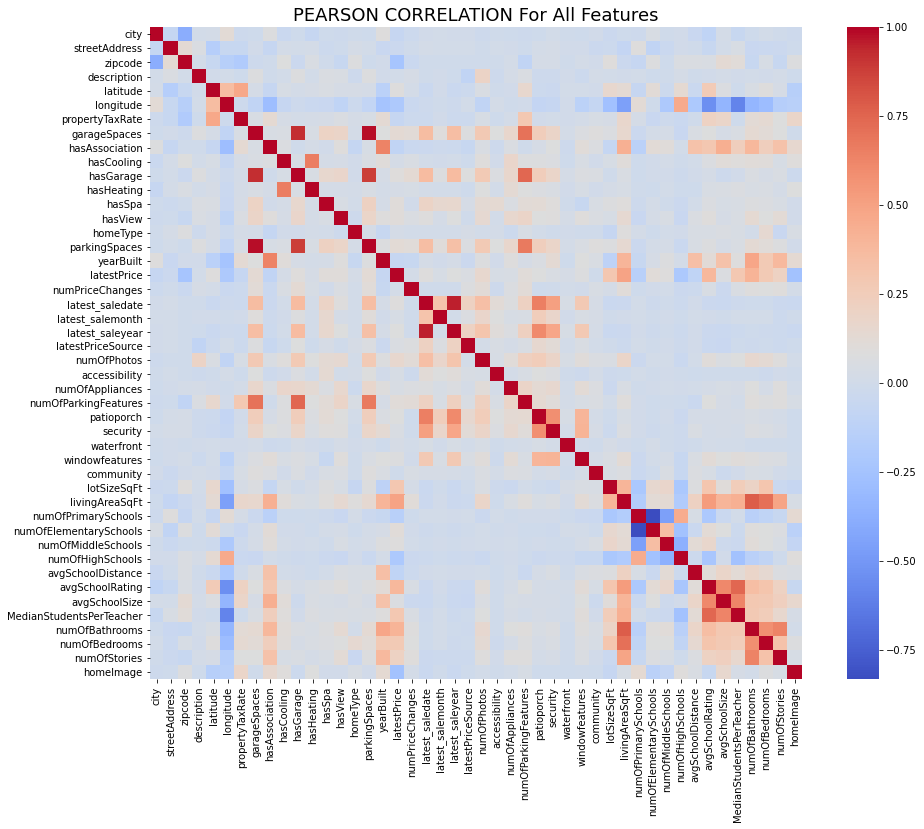

In [10]:
## Sam: With all our features encoded into numbers, we can visualize the correlation matrix, as Cynthia has
## done below.
## Import seaborn for heatmap.
import seaborn as sns

## Create a heat map for latest Price correlations to other features only.
## Sam: Since we already stored "df1.corr()" into the "results" variable, we'll edit "df1.corr" to "results".
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(results, cmap="coolwarm", square=True)

## Create title.
plt.title('PEARSON CORRELATION For All Features', fontsize=18)
# To save the below plot, uncomment the below code.
# plt.savefig('CorrAll')
plt.show()

In [11]:
## Round 1
## By refactoring VIF code from statology (2020), we'll finally be able to gauge collinearity
## among our independent variables ('How to Calculate VIF in Python').
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y_1, X_1 = dmatrices('latestPrice ~ city+latitude+longitude+streetAddress+zipcode+description+propertyTaxRate+garageSpaces+hasAssociation+hasCooling+hasGarage+hasHeating+hasSpa+hasView+homeType+parkingSpaces+yearBuilt+numPriceChanges+latest_saledate+latest_salemonth+latest_saleyear+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df1, return_type='dataframe')
## Notice that we separated our output 'latestPrice' from the remaining 40+ features.
## We also make sure to set 'df1', our working dataframe, as our main source for 
## VIF calculation.
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif1['variable'] = X_1.columns
## Time to sort the VIF values in ascending order.
vif1.sort_values(by=['VIF'])

,VIF,variable
29,1.006809e+00,waterfront
24,1.037903e+00,accessibility
31,1.041052e+00,community
6,1.071992e+00,description
22,1.074395e+00,latestPriceSource
4,1.079067e+00,streetAddress
18,1.085308e+00,numPriceChanges
14,1.102119e+00,hasView
15,1.117521e+00,homeType
25,1.128143e+00,numOfAppliances


In [12]:
## Round 2
df2 = df1.drop(columns=['latest_saleyear', 'latest_saledate', 'latest_salemonth'])
## We'll remove latest_saleyear and latest_saledate from the features for VF1 calculation.
y_2, X_2 = dmatrices('latestPrice ~ city+latitude+longitude+streetAddress+zipcode+description+propertyTaxRate+garageSpaces+hasAssociation+hasCooling+hasGarage+hasHeating+hasSpa+hasView+homeType+parkingSpaces+yearBuilt+numPriceChanges+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df2, return_type='dataframe')
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif2['variable'] = X_2.columns
vif2.sort_values(by=['VIF'])

,VIF,variable
26,1.006607e+00,waterfront
21,1.034045e+00,accessibility
28,1.040687e+00,community
19,1.052062e+00,latestPriceSource
6,1.068338e+00,description
4,1.078960e+00,streetAddress
18,1.081430e+00,numPriceChanges
14,1.101654e+00,hasView
13,1.116152e+00,hasSpa
15,1.117145e+00,homeType


In [13]:

## Round 3
df3 = df2.drop(columns=['hasGarage', 'parkingSpaces', 'garageSpaces'])
## We'll remove hasGarage, parkingSpaces, and garageSpaces from the features for VF1 calculation.
y_3, X_3 = dmatrices('latestPrice ~ city+latitude+longitude+streetAddress+zipcode+description+propertyTaxRate+hasAssociation+hasCooling+hasHeating+hasSpa+hasView+homeType+yearBuilt+numPriceChanges+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage', data=df3, return_type='dataframe')
vif_3 = pd.DataFrame()
vif_3['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif_3['variable'] = X_3.columns
vif_3.sort_values(by=['VIF'])

,VIF,variable
23,1.006308e+00,waterfront
18,1.032455e+00,accessibility
25,1.038293e+00,community
16,1.051617e+00,latestPriceSource
6,1.066968e+00,description
15,1.077144e+00,numPriceChanges
4,1.078370e+00,streetAddress
11,1.086735e+00,hasSpa
12,1.099779e+00,hasView
13,1.114715e+00,homeType


In [14]:
final = df1.columns.tolist()
final.remove('latestPrice')
final

['city',
 'streetAddress',
 'zipcode',
 'description',
 'latitude',
 'longitude',
 'propertyTaxRate',
 'garageSpaces',
 'hasAssociation',
 'hasCooling',
 'hasGarage',
 'hasHeating',
 'hasSpa',
 'hasView',
 'homeType',
 'parkingSpaces',
 'yearBuilt',
 'numPriceChanges',
 'latest_saledate',
 'latest_salemonth',
 'latest_saleyear',
 'latestPriceSource',
 'numOfPhotos',
 'accessibility',
 'numOfAppliances',
 'numOfParkingFeatures',
 'patioporch',
 'security',
 'waterfront',
 'windowfeatures',
 'community',
 'lotSizeSqFt',
 'livingAreaSqFt',
 'numOfPrimarySchools',
 'numOfElementarySchools',
 'numOfMiddleSchools',
 'numOfHighSchools',
 'avgSchoolDistance',
 'avgSchoolRating',
 'avgSchoolSize',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'numOfStories',
 'homeImage']

<AxesSubplot:title={'center':'(1st) PEARSON CORRELATION For Final Features'}>

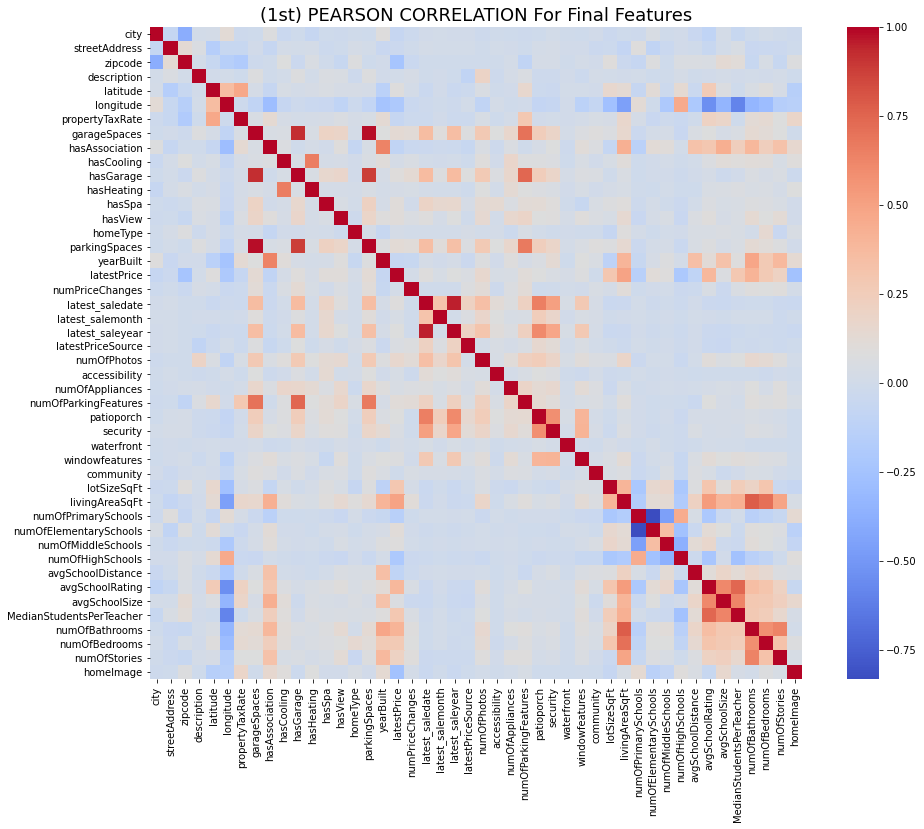

In [15]:
## We'll create new results by passing corr() to our df3.
new_results = df1.corr()
plt.subplots(figsize=(16,12))
plt.title('(1st) PEARSON CORRELATION For Final Features', fontsize=18)
sns.heatmap(new_results, cmap='coolwarm', square=True)
# To save the below plot, uncomment the below code.
# plt.savefig('1stCorrFinal')

In [16]:
## We'll prepare our demonstration input data by isolating our dataframe's top 10 correlated columns
X = df1[final]
X.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,accessibility,numOfAppliances,numOfParkingFeatures,patioporch,security,waterfront,windowfeatures,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,3,3410,78660,992,30.430632,-97.663078,1.98,2,1,1,1,1,0,0,1,2,2012,5,507,9,2019,46,39,0,5,2,1,1,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,75
1,3,971,78660,3489,30.432673,-97.661697,1.98,2,1,1,1,1,0,0,1,2,2013,1,843,10,2020,4,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,430
2,3,3275,78660,12097,30.409748,-97.639771,1.98,0,1,1,0,1,0,0,1,0,2018,1,479,7,2019,4,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,1179
3,3,340,78660,3503,30.432112,-97.661659,1.98,2,1,1,1,1,0,0,1,2,2013,4,175,8,2018,4,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,436
4,3,3524,78660,5003,30.437368,-97.656860,1.98,0,1,1,0,1,0,0,1,0,2002,3,250,10,2018,4,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,10596


In [17]:
## Our output data will simply be our price data.
output = df1['latestPrice']
y = pd.DataFrame(output)
y

,latestPrice
0,305000.0
1,295000.0
2,256125.0
3,240000.0
4,239900.0
...,...
12928,280000.0
12929,330000.0
12930,550000.0
12931,875000.0


In [18]:
## We will standardize our data so that it's easier to identify our most important independent variables for 
## predicting our output (Frost, 2021, 'Identifying the Most Important Independent Variables in Regression Models').
## https://statisticsbyjim.com/regression/identifying-important-independent-variables/
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_X = data_scaler.fit_transform(X)
scaled_y = data_scaler.fit_transform(y)

In [19]:
## Now we can split our demo data into training and testing data, as we've done in 17.3.1 (2021). 
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
scaled_y, random_state=1)
## Let's look at the dimensions of our training and testing data.

In [20]:
X_train.shape

(9699, 45)

In [21]:
y_train.shape

(9699, 1)

In [22]:
X_test.shape

(3234, 45)

In [23]:
y_test.shape

(3234, 1)

In [24]:
## We see that our testing data has 3,234 samples while our training data has 9,699 samples.
## Compared to the over 12,000 entries of Austin housing data, our testing and training data
## will be easier for our linear regression model to handle.

In [25]:
## Like we've done in 17.2.3 (2021), we'll use the training data to train our 
## Sklearn linear regression model. However, we'll train the model with
## one line of code by applying fit() to LinearRegression() in the same function.
model = LinearRegression().fit(X_train, y_train)

In [26]:
## With our model ready, we'll use it to predict prices using testing data, similar to what
## we've done in 17.3.1 (2021).
y_pred = model.predict(X_test)
y_pred

array([[ 0.00184365],
       [-0.0429239 ],
       [-0.21692339],
       ...,
       [ 0.70151872],
       [-0.24643712],
       [-0.24168174]])

In [27]:
## We'll store our coefficient values in a transposed dataframe.
coefficients = model.coef_
coeff = pd.DataFrame(coefficients, columns=final)
coeff_T = coeff.transpose()
coeff_sorted = coeff_T.sort_values(by=0, ascending=False)
coeff_sorted.head()

,0
livingAreaSqFt,0.587764
latest_saledate,0.391754
avgSchoolRating,0.306818
numOfBathrooms,0.170720
longitude,0.116914


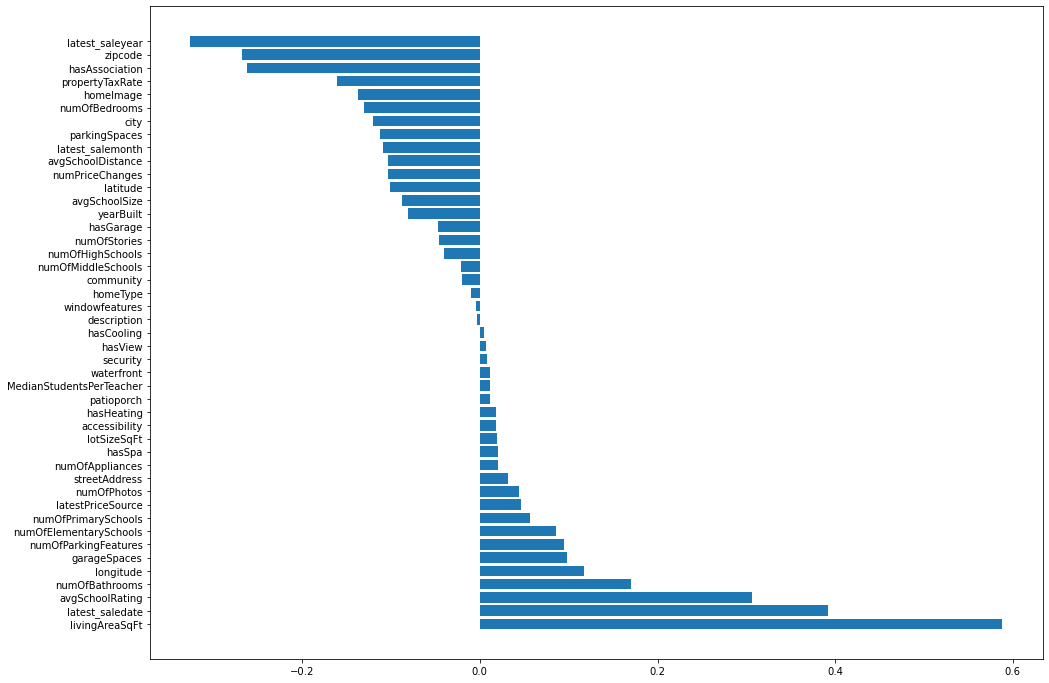

In [28]:
## We'll visualize the degree of the coefficients for our price-predicting model.
names = coeff_sorted.index
values = coeff_sorted[0]
plt.subplots(figsize=(16,12))
plt.barh(names, values)
# To save the below plot, uncomment the below code.
plt.savefig('1stCoeff.png')

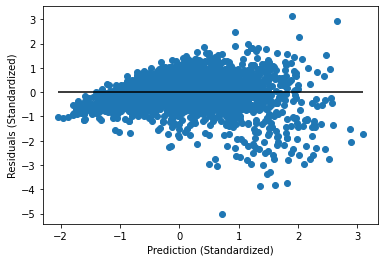

In [29]:
## As seen in classwork code for multilinear regression (2021), we can represent the difference between our model's
## predicted values and the actual test output values on a residual plot. The smaller the difference is,
## the closer the predictions are to the actual value, and ultimately the more accurate our model would be.
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Prediction (Standardized)')
plt.ylabel('Residuals (Standardized)')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='black')
# To save the below plot, uncomment the below code.
# plt.savefig('chk1.png')
plt.show()

# Round 1 - DF1 - Removed 'zip_rank', 'median_zip', 'pr_sqft', 'zpid'

In [30]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = "{:.5f}".format(model.score(X_test, y_test))
intercept = model.intercept_
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
MSE = "{:.5f}".format(mean_squared_error(y_test, y_pred))

## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = "{:.5f}".format(mean_squared_error(y_test, y_pred, squared=False))

## Another metric we can calculate is mean absolute error (MAE)
MAE = "{:.5f}".format(mean_absolute_error(y_test, y_pred))

print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RootMSE}")
print(f"Mean Absolute Error : {MAE}")
print(f"DF-1 R^2 Score: {score}")
print(f"Model Intecept: {intercept}")

Mean Squared Error: 0.39871
Root Mean Squared Error: 0.63143
Mean Absolute Error : 0.44378
DF-1 R^2 Score: 0.59247
Model Intecept: [-0.00043569]


# Round 2 - DF 2 - Removed 'latest_saleyear', 'latest_saledate', 'latest_salemonth'

In [31]:
final = df2.columns.tolist()
final.remove('latestPrice')
X = df2[final]
output = df2['latestPrice']
y = pd.DataFrame(output)
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_X = data_scaler.fit_transform(X)
scaled_y = data_scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
scaled_y, random_state=1)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
coefficients = model.coef_
coeff = pd.DataFrame(coefficients, columns=final)
coeff_T = coeff.transpose()
coeff_sorted = coeff_T.sort_values(by=0, ascending=False)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = "{:.5f}".format(model.score(X_test, y_test))
intercept = model.intercept_
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
MSE = "{:.5f}".format(mean_squared_error(y_test, y_pred))

## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = "{:.5f}".format(mean_squared_error(y_test, y_pred, squared=False))

## Another metric we can calculate is mean absolute error (MAE)
MAE = "{:.5f}".format(mean_absolute_error(y_test, y_pred))

print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RootMSE}")
print(f"Mean Absolute Error : {MAE}")
print(f"DF-2 R^2 Score: {score}")
print(f"Model Intecept: {intercept}")

Mean Squared Error: 0.39991
Root Mean Squared Error: 0.63238
Mean Absolute Error : 0.44511
DF-2 R^2 Score: 0.59124
Model Intecept: [-0.00034847]


# Round 3 - DF 3 - 'hasGarage', 'parkingSpaces', 'garageSpaces'

In [33]:
final = df3.columns.tolist()
final.remove('latestPrice')
X = df3[final]
output = df3['latestPrice']
y = pd.DataFrame(output)
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_X = data_scaler.fit_transform(X)
scaled_y = data_scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
scaled_y, random_state=1)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
coefficients = model.coef_
coeff = pd.DataFrame(coefficients, columns=final)
coeff_T = coeff.transpose()
coeff_sorted = coeff_T.sort_values(by=0, ascending=False)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = "{:.5f}".format(model.score(X_test, y_test))
intercept = model.intercept_
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
MSE = "{:.5f}".format(mean_squared_error(y_test, y_pred))

## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = "{:.5f}".format(mean_squared_error(y_test, y_pred, squared=False))

## Another metric we can calculate is mean absolute error (MAE)
MAE = "{:.5f}".format(mean_absolute_error(y_test, y_pred))

print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RootMSE}")
print(f"Mean Absolute Error : {MAE}")
print(f"DF-3 R^2 Score: {score}")
print(f"Model Intecept: {intercept}")


Mean Squared Error: 0.39971
Root Mean Squared Error: 0.63223
Mean Absolute Error : 0.44493
DF-3 R^2 Score: 0.59144
Model Intecept: [-0.00028938]
